# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [59]:
import pandas as pd
import numpy as np

In [60]:
file=pd.read_csv('CarPrice_Assignment.csv' , na_values="?")
file

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [61]:
obj_df = file.select_dtypes(include=['object']) ###.copy()
obj_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [62]:

obj_df[obj_df.isnull().any(axis=1)]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem


In [63]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero stelvio,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi 100 ls,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi 100ls,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [64]:
obj_df["OHC_Code"] = np.where(obj_df["enginetype"].str.contains("ohc"), 1, 0)
obj_df["Carname"] = np.where(obj_df["CarName"].str.contains("audi"), 1, 0)
cod_obj=pd.get_dummies(obj_df, columns=["carbody", "drivewheel","enginelocation","aspiration","fueltype","fuelsystem"], prefix=["body", "drive","loc", "aspir","fuel","mfi"])
cod_obj

,CarName,doornumber,enginetype,cylindernumber,OHC_Code,Carname,body_convertible,body_hardtop,body_hatchback,body_sedan,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,alfa-romero giulia,2,dohc,4,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,alfa-romero stelvio,2,dohc,4,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,alfa-romero Quadrifoglio,2,ohcv,6,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,audi 100 ls,4,ohc,4,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,audi 100ls,4,ohc,5,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),4,ohc,4,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
201,volvo 144ea,4,ohc,4,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
202,volvo 244dl,4,ohcv,6,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
203,volvo 246,4,ohc,6,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [65]:
obj_df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,OHC_Code,Carname
0,alfa-romero giulia,gas,std,2,convertible,rwd,front,dohc,4,mpfi,1,0
1,alfa-romero stelvio,gas,std,2,convertible,rwd,front,dohc,4,mpfi,1,0
2,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,1,0
3,audi 100 ls,gas,std,4,sedan,fwd,front,ohc,4,mpfi,1,1
4,audi 100ls,gas,std,4,sedan,4wd,front,ohc,5,mpfi,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,4,sedan,rwd,front,ohc,4,mpfi,1,0
201,volvo 144ea,gas,turbo,4,sedan,rwd,front,ohc,4,mpfi,1,0
202,volvo 244dl,gas,std,4,sedan,rwd,front,ohcv,6,mpfi,1,0
203,volvo 246,diesel,turbo,4,sedan,rwd,front,ohc,6,idi,1,0


In [66]:
cod_obj.columns
del cod_obj['CarName']
del cod_obj['enginetype']

In [67]:
cod_obj

,doornumber,cylindernumber,OHC_Code,Carname,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,2,4,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,4,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,6,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,4,4,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,4,5,1,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,4,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
201,4,4,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
202,4,6,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
203,4,6,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [68]:
dataaa = file.select_dtypes(include=['int64'])
dataf= file.select_dtypes(include=['float64'])
dataaa

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,1,3,2548,130,111,5000,21,27
1,2,3,2548,130,111,5000,21,27
2,3,1,2823,152,154,5000,19,26
3,4,2,2337,109,102,5500,24,30
4,5,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28
201,202,-1,3049,141,160,5300,19,25
202,203,-1,3012,173,134,5500,18,23
203,204,-1,3217,145,106,4800,26,27


In [69]:
df_col_merged = pd.concat([dataaa, dataf], axis=1)
df_col_merged 

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,1,3,2548,130,111,5000,21,27,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,2,3,2548,130,111,5000,21,27,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,3,1,2823,152,154,5000,19,26,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,4,2,2337,109,102,5500,24,30,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,5,2,2824,136,115,5500,18,22,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,202,-1,3049,141,160,5300,19,25,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,203,-1,3012,173,134,5500,18,23,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,204,-1,3217,145,106,4800,26,27,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


In [70]:
final=pd.concat([df_col_merged, cod_obj],axis=1)
final

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,1,3,2548,130,111,5000,21,27,88.6,168.8,...,0,1,0,0,0,0,0,1,0,0
1,2,3,2548,130,111,5000,21,27,88.6,168.8,...,0,1,0,0,0,0,0,1,0,0
2,3,1,2823,152,154,5000,19,26,94.5,171.2,...,0,1,0,0,0,0,0,1,0,0
3,4,2,2337,109,102,5500,24,30,99.8,176.6,...,0,1,0,0,0,0,0,1,0,0
4,5,2,2824,136,115,5500,18,22,99.4,176.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
201,202,-1,3049,141,160,5300,19,25,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
202,203,-1,3012,173,134,5500,18,23,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
203,204,-1,3217,145,106,4800,26,27,109.1,188.8,...,1,0,0,0,0,1,0,0,0,0


In [71]:
label=final['price'].copy()
label

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [72]:
del final['price']
final

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi
0,1,3,2548,130,111,5000,21,27,88.6,168.8,...,0,1,0,0,0,0,0,1,0,0
1,2,3,2548,130,111,5000,21,27,88.6,168.8,...,0,1,0,0,0,0,0,1,0,0
2,3,1,2823,152,154,5000,19,26,94.5,171.2,...,0,1,0,0,0,0,0,1,0,0
3,4,2,2337,109,102,5500,24,30,99.8,176.6,...,0,1,0,0,0,0,0,1,0,0
4,5,2,2824,136,115,5500,18,22,99.4,176.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
201,202,-1,3049,141,160,5300,19,25,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
202,203,-1,3012,173,134,5500,18,23,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
203,204,-1,3217,145,106,4800,26,27,109.1,188.8,...,1,0,0,0,0,1,0,0,0,0


In [73]:
final[final.isnull().any(axis=1)]

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,...,fuel_diesel,fuel_gas,mfi_1bbl,mfi_2bbl,mfi_4bbl,mfi_idi,mfi_mfi,mfi_mpfi,mfi_spdi,mfi_spfi


In [74]:
final=np.array(final)
label=np.array(label)

In [75]:
train_data=final[:170]
train_targets=label[:170]

test_data=final[170:]
test_targets=label[170:]

test_targets.shape


(35,)

In [76]:
#mean = train_data.mean(axis=0)
#train_data -= mean
#std = train_data.std(axis=0)
#train_data /= std
#test_data -= mean
#test_data /= std

In [77]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [78]:

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [79]:

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [80]:
all_scores

[2405.8936, 16381.495, 3353.0308, 11620.992]

In [81]:
num_epochs = 60
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [82]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

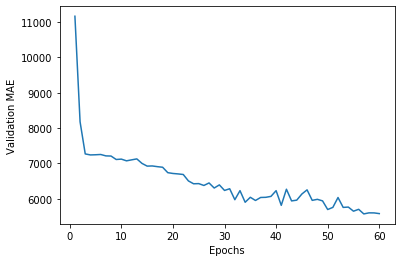

In [83]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

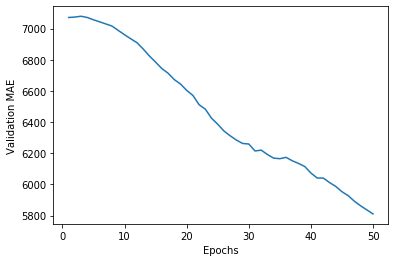

In [84]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [85]:
model = build_model()
model.fit(train_data, train_targets,
epochs=60, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

35/35 [==============================] - 0s 11ms/sample - loss: 11853493.4857 - mean_absolute_error: 2861.2920


In [86]:
 test_mae_score

2861.292